In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm, multivariate_normal
import random

%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
df = pd.read_csv(pm.get_data('mastectomy.csv'))
df.event = df.event.astype(np.int64)
df.metastized = (df.metastized == 'yes').astype(np.int64)
n_patients = df.shape[0]
patients = np.arange(n_patients)

## Horizontal Lines

https://docs.pymc.io/notebooks/survival_analysis.html

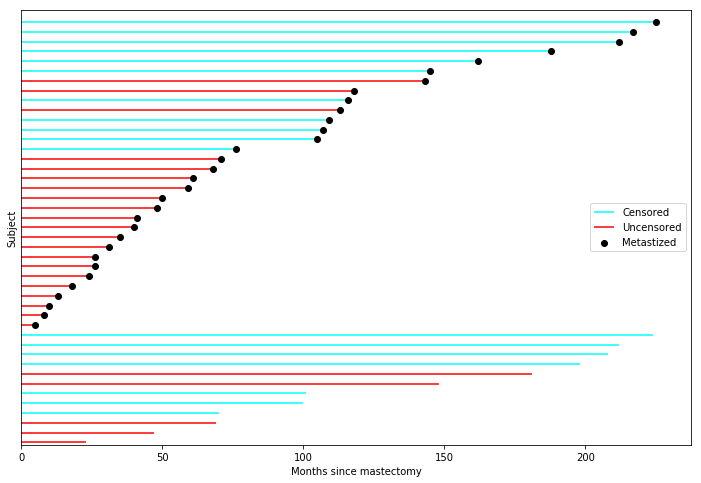

In [75]:

fig, ax = plt.subplots(figsize=(12, 8))

ax.hlines(
    patients[df.event.values == 0], 0, df[df.event.values == 0].time,
          color='#00FFFF', label='Censored')

ax.hlines(
    patients[df.event.values == 1], 0, df[df.event.values == 1].time,
          color='#FF0000', label='Uncensored')

ax.scatter(
    df[df.metastized.values == 1].time,
    patients[df.metastized.values == 1],
           color='k', zorder=10, label='Metastized')

ax.set_xlim(left=0)
ax.set_xlabel('Months since mastectomy')
ax.set_yticks([])
ax.set_ylabel('Subject')

ax.set_ylim(-0.25, n_patients + 0.25)

ax.legend(loc='center right');

## Plotting Distributions

/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/matplotlib/legend.py:647: UserWarning: Unrecognized location "foo". Falling back on "upper right"; valid locations are
	lower center
	center
	upper right
	upper left
	lower left
	center right
	best
	center left
	upper center
	right
	lower right

  % (loc, '\n\t'.join(self.codes)))


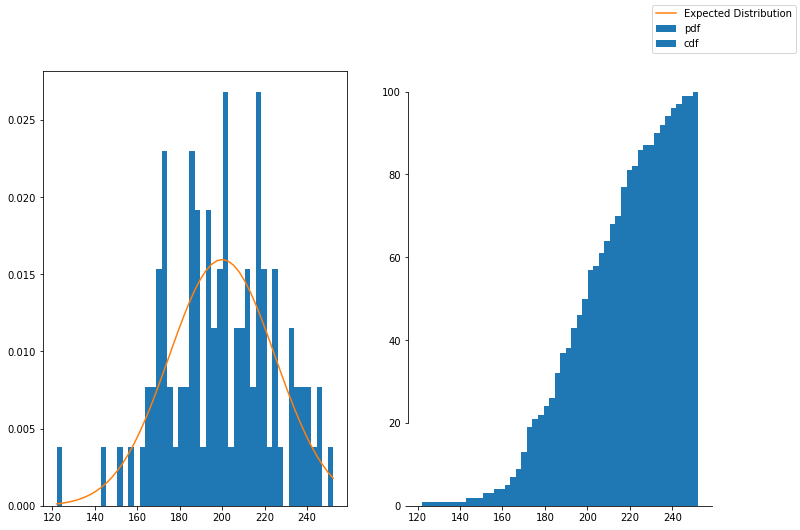

In [87]:
np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
n1, bins1, patches1 = ax1.hist(x, n_bins,
        density=True,
        cumulative=False,
        histtype='barstacked',
        label='pdf');

ax1.plot(bins1, norm.pdf(bins1, mu, sigma), label='Expected Distribution')

ax2.hist(x, n_bins,
        density=False,
        cumulative=True,
        histtype='barstacked',
        label='cdf');

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_bounds(20, 100)

# fig.legend(loc = 'upper right');
#fig.legend(loc = 'lower left');
fig.legend(loc = 'foo');

## Contour Plots

https://matplotlib.org/examples/images_contours_and_fields/contourf_log.html
https://matplotlib.org/2.0.0/examples/pylab_examples/contourf_demo.html

In [9]:
N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  import sys
/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  


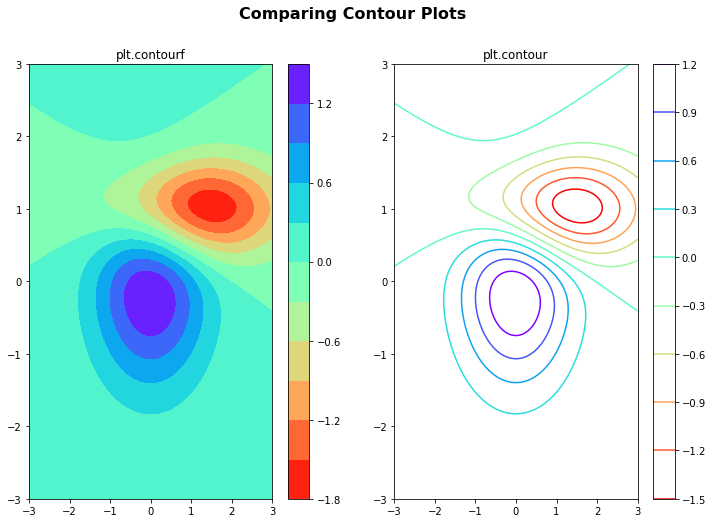

In [89]:
origin = 'lower'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

fig.suptitle('Comparing Contour Plots', fontweight='heavy', fontsize=16)

#cmap = plt.cm.bone_r
cmap = plt.cm.rainbow_r

CS1 = ax1.contourf(X, Y, Z, 10, cmap=cmap)
ax1.set(title='plt.contourf');
fig.colorbar(CS1, ax=ax1)

CS2 = ax2.contour(X, Y, Z, 10, cmap=cmap)
ax2.set(title='plt.contour')
fig.colorbar(CS2, ax=ax2);
# fig.colorbar(CS2, ax=ax2, orientation='horizontal');

## Vector fields

https://matplotlib.org/examples/images_contours_and_fields/streamplot_demo_features.html

I've never had reason to use these in my work, they look cool though.

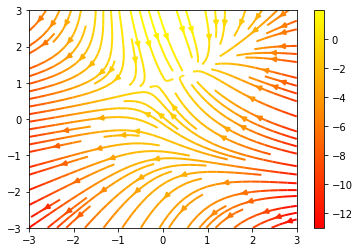

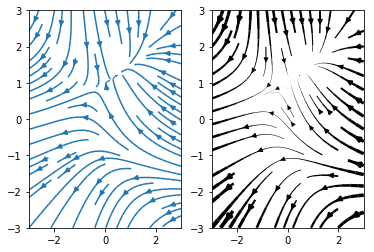

In [10]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

## Violin Plots

https://matplotlib.org/examples/statistics/violinplot_demo.html

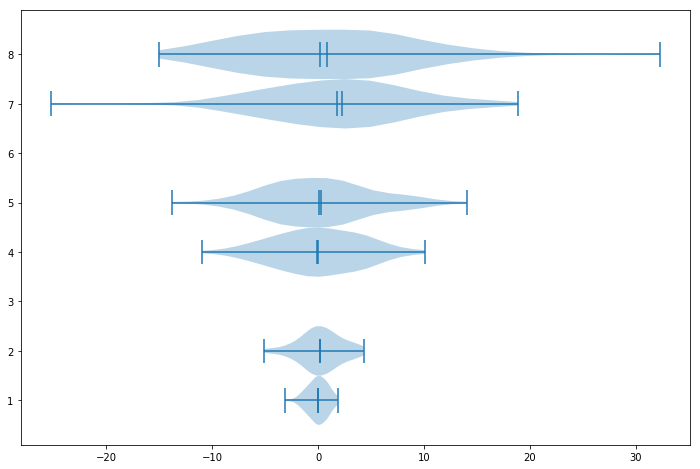

In [82]:
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, ax = plt.subplots(figsize=(12, 8))

ax.violinplot(
    data,
    pos,
    points=20,
    widths=1.,
    showmeans=True,
    showmedians=True,
    showextrema=True,
    # vert=True,
    vert=False);